# Introduction to scikit-learn (sklearn)


In [1]:
what_were_covering=[
    '0. An end-to-end scikit learn workflow',
    '1. Getting the data ready',
    '2. Choose the right estimator/algorithm for our problems',
    '3. Fit the model/algorithm and use it to make predictions on our data',
    '4. Evaluating a model',
    '5. Improve a model',
    '6. Save and load a trained model',
    '7. Putting it all together'
]

In [2]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# Get the data ready
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create X (feature matrix)
x=heart_disease.drop('target', axis=1)

# Create y (labels)
y=heart_disease['target']

In [5]:
# 2 Choose the right model and hypherparameter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# We will keep the default hyperparameter
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#3. fit the model to the tranning data
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)

0.7704918032786885

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [12]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 6, 26]])

In [14]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [15]:
# 5 improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 110, 10):
    print(f'Trying model with {i} estimators param')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f'Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f} ')

Trying model with 10 estimators param
Model accuracy on test set: 70.49 
Trying model with 20 estimators param
Model accuracy on test set: 78.69 
Trying model with 30 estimators param
Model accuracy on test set: 75.41 
Trying model with 40 estimators param
Model accuracy on test set: 77.05 
Trying model with 50 estimators param
Model accuracy on test set: 80.33 
Trying model with 60 estimators param
Model accuracy on test set: 73.77 
Trying model with 70 estimators param
Model accuracy on test set: 81.97 
Trying model with 80 estimators param
Model accuracy on test set: 77.05 
Trying model with 90 estimators param
Model accuracy on test set: 78.69 
Trying model with 100 estimators param
Model accuracy on test set: 72.13 


In [16]:
# 6. Save a model and load it

import pickle 
pickle.dump(clf, open('data/random_forest_model_1.pkl', 'wb'))

In [17]:
load_model = pickle.load(open('data/random_forest_model_1.pkl', 'rb'))
load_model.score(x_test, y_test)

0.7213114754098361

In [18]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [19]:
len(car_sales)

1000

In [20]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [21]:
# Split X and Y
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

# Split into training and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
# Build machine learing model
from sklearn.ensemble import RandomForestRegressor

# TURN THE Categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cateorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, cateorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X





array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [23]:
# Lets refit the model

np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
model.score(X_test, Y_test)


0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some value (also known as imputation). 
2. Remove the samples with missing data altogether. 



In [25]:
# Import missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [26]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
# Fill the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [28]:
car_sales_missing.isna().sum()


Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [29]:
car_sales_missing.dropna(inplace=True)

In [30]:
car_sales_missing.isna().sum()


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [31]:
len(car_sales_missing)


950

In [32]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [33]:
# Lets convet data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X



<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### option 2 : Fill missing values with scikit-learn

In [34]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [36]:
# Split into X & Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [37]:
# Fill missing values with scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with missing & numerical values with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer  = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])
# Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [38]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [40]:
# Now we have got our data as numbers and filled (no missing data)
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)




0.21990196728583944

## 2.1 Picking a machine learning model for a regression problem

In [41]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()


In [42]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
# Lets try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup reandom seed
np.random.seed(42)

# Create the data 
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Instantiate Ride model
model = Ridge()
model.fit(X_train, Y_train)

# Check the score of the Ridge model on test data 
model.score(X_test, Y_test)



0.6662221670168522

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data 

X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instatiate Random ForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

#Evalute the Random Forest Regressor

rf.score(X_test, Y_test)


0.873969014117403

In [45]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test data 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model 
model = RandomForestRegressor().fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

model.score(X_test, y_test)

0.873969014117403

In [46]:
y_preds[:10]


array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [47]:
np.array(y_test)[:10]


array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [48]:
# compare the predictins to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## Evaluating a machine learning model 

Three ways to evaluate scikit learn model/esitmators:

1. Estimator score method 
2. The `scoring `parameter
3. Problem specific metric functions

In [49]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

4.2 Evaluating a model using the `scoring` parameter

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
cross_val_score(clf, X, y)


array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [52]:
np.random.seed(42)

# Single trainning and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

**Area under curve (AUC)**

In [53]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [54]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]


array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [55]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

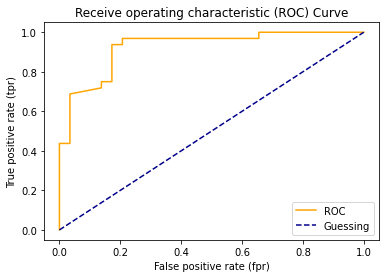

In [56]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    """
    Plots a Roc curve given the false postive rate (fpr)
    and true postive rate4 (tpr) of a model.
    """
    # plot roc curve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1],[0, 1], color="darkblue", linestyle="--", label="Guessing")

    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receive operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

** Confusion Matrix**<br> 
A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
in essence, giving you an idea of where the getting confused



In [58]:

# MAke our confusion matrix more visual with seaborn heatmap()
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# clf = clf.fit(X_train, y_train)
# y_preds = clf.predict(X_test)
# set the font scale
sns.set(font_scale=1.5)
# create a confusin matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn 

sns.heatmap(conf_mat);


ValueError: Found input variables with inconsistent numbers of samples: [61, 102]

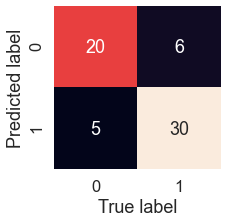

In [41]:
def plot_conf_mat(conf_mat):
    """
    plot a confusion matrix using seaborns heatmao().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                      cbar=False)

    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
plot_conf_mat(conf_mat)    



**Classification Report**

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))



              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.86      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



### 4.2.2 Regression model evaluation metrics

1. R^2 or cofficient determination
2. Mean absolute error (MAE)
3. Mean squared error (MAE)


In [51]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);


In [52]:
model.score(X_test, y_test)


0.873969014117403

In [54]:
from sklearn.metrics import r2_score
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [56]:
y_test.mean()

21.488235294117644

In [58]:
r2_score(y_test, y_test_mean)

0.0

In [57]:
r2_score(y_test, y_test)

1.0

**Mean absolute error**

In [61]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

29.973032786885245

In [62]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

898.6173211311476

### Finally using the `scoring ` parameter

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [64]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [66]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%')


The cross-validated accuracy is : 82.48%


In [69]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_acc)

0.8545454545454545

## using different evalution metrics as scikit learn functions
**Classification evalution functions**

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predeictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the tewst set")
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100:.2f}")
print(f"Precision : {precision_score(y_test, y_preds)}")
print(f"Recall : {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the tewst set
Accuracy : 85.25
Precision : 0.8484848484848485
Recall : 0.875
F1: 0.8615384615384615


**Regressor evalution functions**


In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
model = RandomForestRegressor()

# make predictions using our regression model
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Evaluate the regression model

print("Regression model metrics on the test set")
print(f"R^ 2 {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Regression model metrics on the test set
R^ 2 0.7800871080051693
MAE : 2.984938271604939
MSE: 19.25037530370372


## 5 Inmproving a model

three ways to adjust hyperparameters

1. by hand
2. randomly with randomSearchCV
3. Exhaustivelt with GridSearchCv



In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [82]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameter by hand
lets make 3 set , trainning , validation and test.

1. max_features
2. min_sample_leaf
3. nim_sample_split
4. n_estimators

In [84]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs, y_pred labels
    pn a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f" Acc : {metric_dict['accuracy']*100}%")
    print(f"precision: {metric_dict['precision']}")
    print(f"Recall : {metric_dict['recall']}")
    print(f"F1 Score : {f1}")

    return metric_dict

In [86]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split the data into train, validation & test sets

train_split = round(0.7 * len(heart_disease_shuffled)) # 70 of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15 % of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split: valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


 Acc : 82.0%
precision: 0.81
Recall : 0.88
F1 Score : 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [91]:

np.random.seed(42)

# create a second classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators=50)
clf_2.fit(X_train, y_train)

# make baseline predictions
y_preds_2 = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds_2)
baseline_metrics



 Acc : 82.0%
precision: 0.81
Recall : 0.88
F1 Score : 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparmter tuning with RandomizedSearchCV

In [96]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

# Aplit into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCv
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)
# Fit the randomizedSearchCV version of clf

rs_clf.fit(X_train, y_train)                            

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samp

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [97]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [98]:
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

 Acc : 82.0%
precision: 0.77
Recall : 0.86
F1 Score : 0.8135593220338982


In [99]:
grid_2 = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
}

In [100]:
from sklearn.model_selection import GridSearchCV


np.random.seed(42)

# Aplit into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)
# Fit the randomizedSearchCV version of clf

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto,

In [101]:
gs_clf.best_params_


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [102]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

 Acc : 79.0%
precision: 0.74
Recall : 0.82
F1 Score : 0.7796610169491526


<AxesSubplot:>

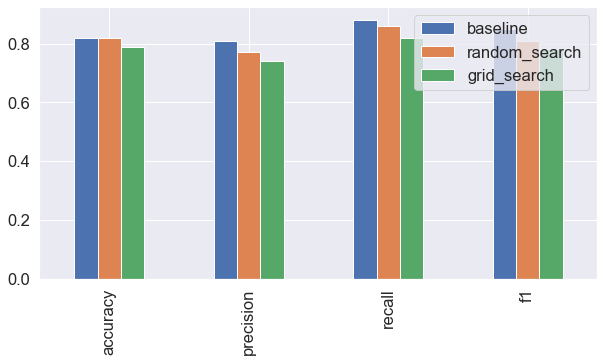

In [105]:
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "random_search": rs_metrics,
    "grid_search": gs_metrics
})
compare_metrics.plot.bar(figsize=(10, 5))

## 6 saving and loading trained machine learing models
Two ways to save and load machine learing models:

1. With Pythons `pickle` module
2. With `joblib` module

In [106]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

In [107]:
load_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb"))

In [108]:
# make some predictions
pickle_y_preds = load_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

 Acc : 79.0%
precision: 0.74
Recall : 0.82
F1 Score : 0.7796610169491526


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [109]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest_mode_1.joblib")

['gs_random_forest_mode_1.joblib']

In [111]:
# import a saved joblib model
load_joblib_model = load(filename="gs_random_forest_mode_1.joblib")

In [112]:
joblib_y_preds = load_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

 Acc : 79.0%
precision: 0.74
Recall : 0.82
F1 Score : 0.7796610169491526


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}